In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
df=pd.read_csv('E:\XREA_Project_Documents\indexing-application-main\Data\indices.csv')
df

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index
0,"Abilene city, Texas",0.901207,0.851076,0.866168,0.962503
1,"Addison village, Illinois",0.775693,0.757069,0.787693,0.806168
2,"Alafaya CDP, Florida",0.871782,0.887348,0.823137,0.930423
3,"Algonquin village, Illinois",0.857186,0.816892,0.830228,0.818418
4,"Allen city, Texas",0.875983,0.885058,0.848536,0.863848
...,...,...,...,...,...
491,"Woodstock city, Illinois",0.851158,0.811257,0.792950,0.877531
492,"Wright CDP, Florida",0.850223,0.834810,0.789313,0.914090
493,"Wylie city, Texas",0.883945,0.880463,0.812412,0.927621
494,"Yuma city, Arizona",0.819254,0.757194,0.759705,0.828967


In [7]:
df[['Best_Value_Index','CWYK_Index','Retiree_Index','YP_Index']].corr(method='pearson')

,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index
Best_Value_Index,1.000000,0.896081,0.821111,0.910161
CWYK_Index,0.896081,1.000000,0.828658,0.894700
Retiree_Index,0.821111,0.828658,1.000000,0.721752
YP_Index,0.910161,0.894700,0.721752,1.000000


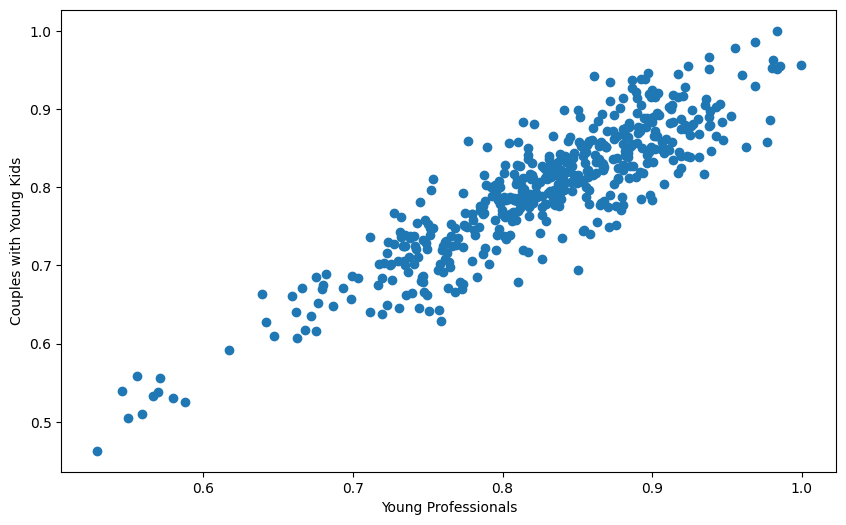

In [4]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Couples with Young Kids

x = df["YP_Index"]
y = df["CWYK_Index"]
plt.scatter(x , y)

plt.xlabel("Young Professionals")
plt.ylabel("Couples with Young Kids")
plt.gcf().set_size_inches((10, 6))    
plt.show()


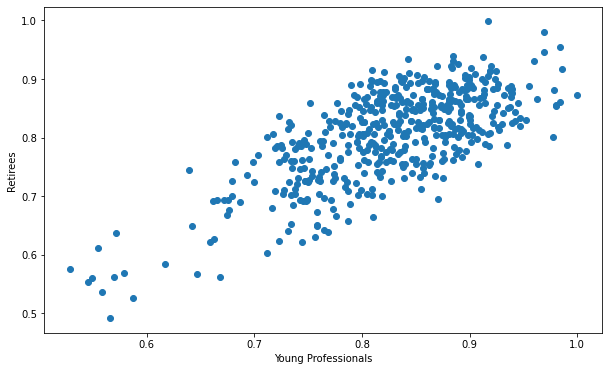

In [10]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Retiree

x = df["YP_Index"]
y = df["Retiree_Index"]
plt.scatter(x , y)

plt.xlabel("Young Professionals")
plt.ylabel("Retirees")
plt.gcf().set_size_inches((10, 6))    
plt.show()


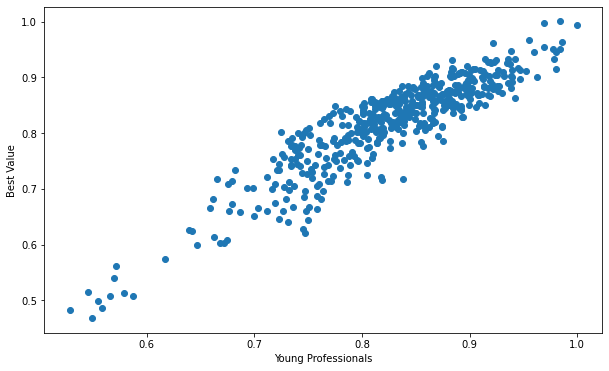

In [11]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Best Value

x = df["YP_Index"]
y = df["Best_Value_Index"]
plt.scatter(x , y )

plt.xlabel("Young Professionals")
plt.ylabel("Best Value")
plt.gcf().set_size_inches((10, 6))    
plt.show()


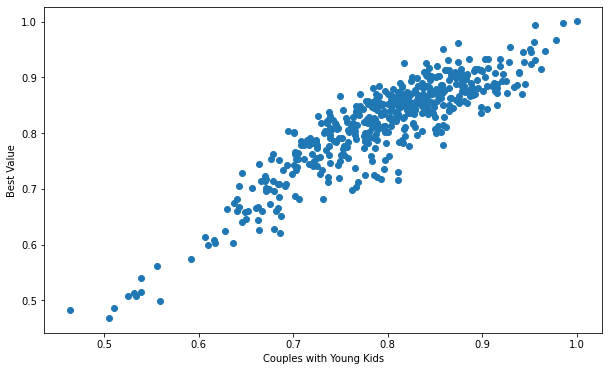

In [12]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Couples with Young Kids and Best Value

x = df["CWYK_Index"]
y = df["Best_Value_Index"]
plt.scatter(x , y )

plt.xlabel("Couples with Young Kids")
plt.ylabel("Best Value")
plt.gcf().set_size_inches((10, 6))    
plt.show()


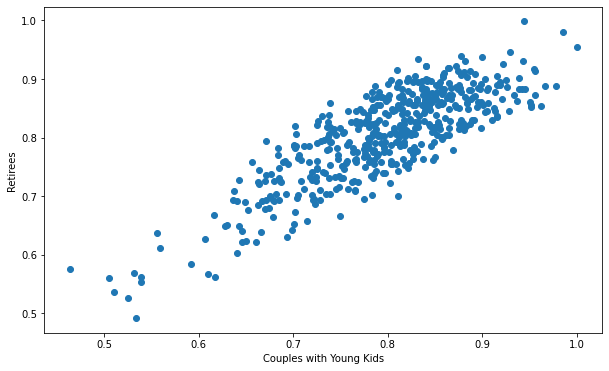

In [13]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Couples with Young Kids and Retiree

x = df["CWYK_Index"]
y = df["Retiree_Index"]
plt.scatter(x , y )

plt.xlabel("Couples with Young Kids")
plt.ylabel("Retirees")
plt.gcf().set_size_inches((10, 6))    
plt.show()


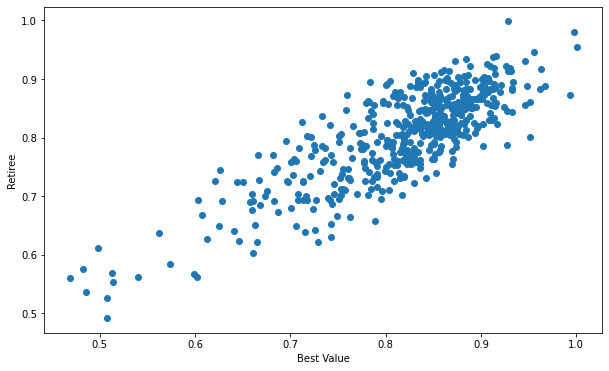

In [14]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Best Value and Retirees

x = df["Best_Value_Index"]
y = df["Retiree_Index"]
plt.scatter(x , y )

plt.xlabel("Best Value")
plt.ylabel("Retiree")
plt.gcf().set_size_inches((10, 6))    
plt.show()


In [15]:
df1=df.drop(['city'],axis=1)

In [16]:
df1

,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index
0,0.901207,0.851076,0.866168,0.962503
1,0.775693,0.757069,0.787693,0.806168
2,0.871782,0.887348,0.823137,0.930423
3,0.857186,0.816892,0.830228,0.818418
4,0.875983,0.885058,0.848536,0.863848
...,...,...,...,...
491,0.851158,0.811257,0.792950,0.877531
492,0.850223,0.834810,0.789313,0.914090
493,0.883945,0.880463,0.812412,0.927621
494,0.819254,0.757194,0.759705,0.828967


In [17]:
# We are going to consider a heuristic approach called Elbow method -- the one of the widely 
# used to find the optimal number of clusters

# The first helper function creates for each value of K the corresponding KMeans model and saves 
# its inertia along with the actual K value

def find_best_clusters(input_data_frame, max_K):
    
    clusters_centers = []
    k_values = []
    
    for cluster_index in range(1, max_K):
        
        kmeans_model = KMeans(n_clusters = cluster_index)
        kmeans_model.fit(input_data_frame)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(cluster_index)
        
    
    return clusters_centers, k_values

In [18]:
# The second function uses those inertias and K values to generate the final Elbow plot

def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()
    

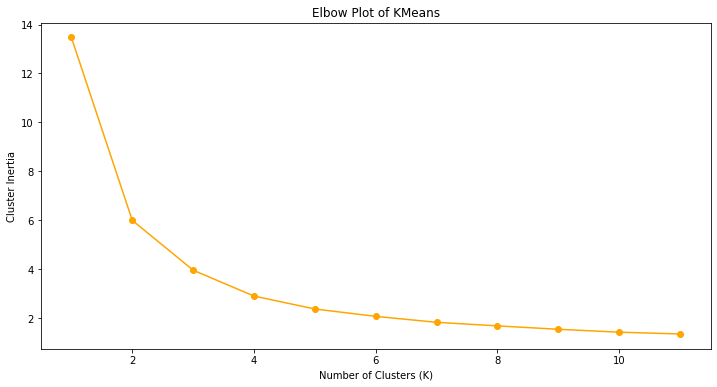

In [19]:
# Now, we can apply the functions to the dataset using a maximum K value of 12
# to get the final result

clusters_centers, k_values = find_best_clusters(df1, 12)
generate_elbow_plot(clusters_centers, k_values)

In [20]:
# Once we have determined the optimal number of clusters from the Elbow plot, we can 
# finally apply the KMeans model to that value
# The variable optimum_cluster_no is determined from the elbow plot

kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(df1)
df["clusters"] = kmeans_model.labels_


In [21]:
df

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index,clusters
0,"Abilene city, Texas",0.901207,0.851076,0.866168,0.962503,1
1,"Addison village, Illinois",0.775693,0.757069,0.787693,0.806168,2
2,"Alafaya CDP, Florida",0.871782,0.887348,0.823137,0.930423,1
3,"Algonquin village, Illinois",0.857186,0.816892,0.830228,0.818418,1
4,"Allen city, Texas",0.875983,0.885058,0.848536,0.863848,1
...,...,...,...,...,...,...
491,"Woodstock city, Illinois",0.851158,0.811257,0.792950,0.877531,1
492,"Wright CDP, Florida",0.850223,0.834810,0.789313,0.914090,1
493,"Wylie city, Texas",0.883945,0.880463,0.812412,0.927621,1
494,"Yuma city, Arizona",0.819254,0.757194,0.759705,0.828967,2


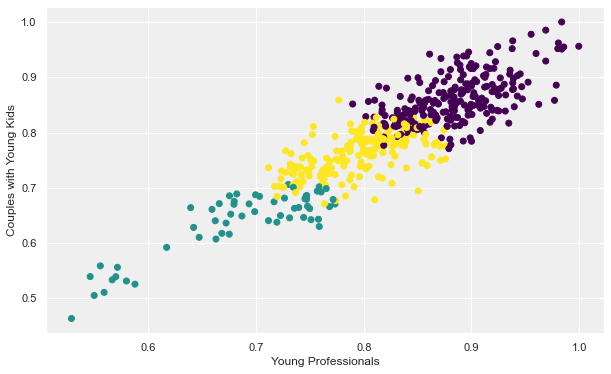

In [214]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Couples with Young Kids

x = df["YP_Index"]
y = df["CWYK_Index"]
plt.scatter(x , y , c = df["clusters"] , cmap='viridis' )

plt.xlabel("Young Professionals")
plt.ylabel("Couples with Young Kids")
plt.gcf().set_size_inches((10, 6))    
plt.show()


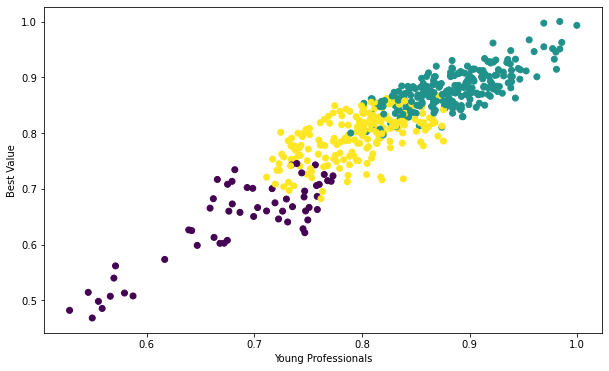

In [24]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Best Value

x = df["YP_Index"]
y = df["Best_Value_Index"]
plt.scatter(x , y , c = df["clusters"] , cmap='viridis' )

plt.xlabel("Young Professionals")
plt.ylabel("Best Value")
plt.gcf().set_size_inches((10, 6))    
plt.show()

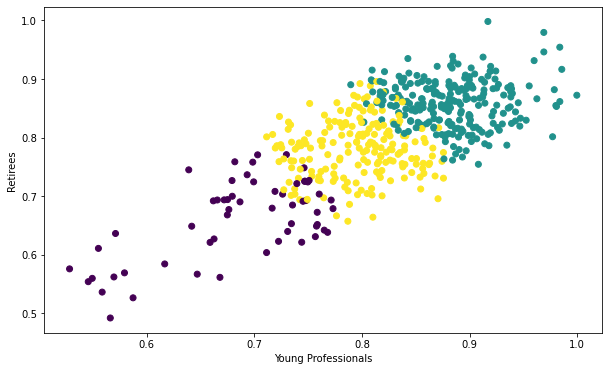

In [22]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Retiree

x = df["YP_Index"]
y = df["Retiree_Index"]
plt.scatter(x , y , c = df["clusters"] , cmap='viridis' )

plt.xlabel("Young Professionals")
plt.ylabel("Retirees")
plt.gcf().set_size_inches((10, 6))    
plt.show()

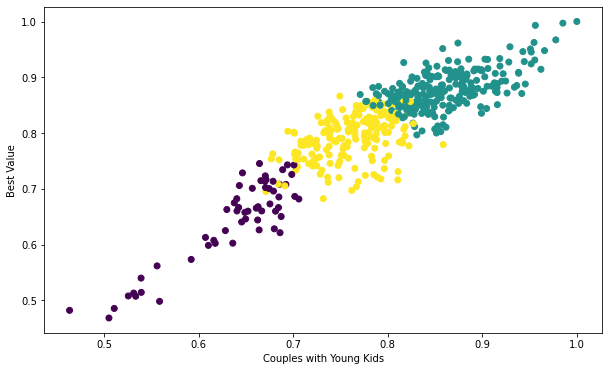

In [25]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Retiree

x = df["CWYK_Index"]
y = df["Best_Value_Index"]
plt.scatter(x , y , c = df["clusters"] , cmap='viridis' )

plt.xlabel("Couples with Young Kids")
plt.ylabel("Best Value")
plt.gcf().set_size_inches((10, 6))    
plt.show()

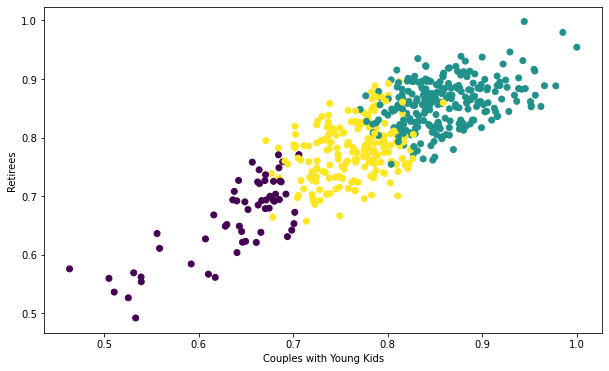

In [26]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Retiree

x = df["CWYK_Index"]
y = df["Retiree_Index"]
plt.scatter(x , y , c = df["clusters"] , cmap='viridis' )

plt.xlabel("Couples with Young Kids")
plt.ylabel("Retirees")
plt.gcf().set_size_inches((10, 6))    
plt.show()

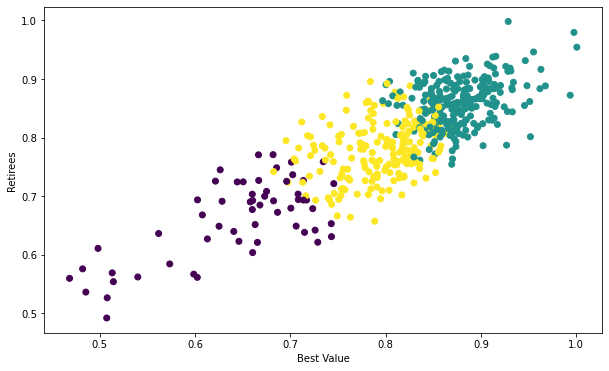

In [27]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Retiree

x = df["Best_Value_Index"]
y = df["Retiree_Index"]
plt.scatter(x , y , c = df["clusters"] , cmap='viridis' )

plt.xlabel("Best Value")
plt.ylabel("Retirees")
plt.gcf().set_size_inches((10, 6))    
plt.show()

In [215]:
df_cluster0=df[df['clusters']==0]
df_cluster1=df[df['clusters']==1]
df_cluster2=df[df['clusters']==2]


In [216]:
df_cluster0

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index,clusters
0,"Abilene city, Texas",0.901207,0.851076,0.866168,0.962503,0
2,"Alafaya CDP, Florida",0.871782,0.887348,0.823137,0.930423,0
3,"Algonquin village, Illinois",0.857186,0.816892,0.830228,0.818418,0
4,"Allen city, Texas",0.875983,0.885058,0.848536,0.863848,0
5,"Altamonte Springs city, Florida",0.844595,0.811734,0.805553,0.884311,0
...,...,...,...,...,...,...
489,"Winter Springs city, Florida",0.857315,0.839300,0.863995,0.884121,0
490,"Woodridge village, Illinois",0.853787,0.848967,0.813545,0.909059,0
491,"Woodstock city, Illinois",0.851158,0.811257,0.792950,0.877531,0
492,"Wright CDP, Florida",0.850223,0.834810,0.789313,0.914090,0


In [217]:
df_cluster0['Best_Value_Index'].mean()

0.8784706903188683

In [218]:
df_cluster0['CWYK_Index'].mean()

0.8600667319457965

In [219]:
df_cluster0['Retiree_Index'].mean()

0.8586792582648216

In [220]:
df_cluster0['YP_Index'].mean()

0.8833979200376728

In [221]:
df_cluster1

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index,clusters
18,"Aventura city, Florida",0.626335,0.663820,0.744767,0.639180,1
41,"Boynton Beach city, Florida",0.674972,0.637516,0.707938,0.719278,1
56,"Carbondale city, Illinois",0.714779,0.665702,0.637950,0.768159,1
90,"Coral Terrace CDP, Florida",0.644187,0.662242,0.724082,0.749756,1
94,"Country Club CDP, Florida",0.645979,0.649469,0.622587,0.722583,1
99,"Dania Beach city, Florida",0.625120,0.628066,0.648430,0.641937,1
109,"Deerfield Beach city, Florida",0.682344,0.640184,0.691771,0.662022,1
117,"Dolton village, Illinois",0.716915,0.671136,0.693251,0.665733,1
131,"Egypt Lake-Leto CDP, Florida",0.723401,0.670366,0.678480,0.773163,1
137,"Elmwood Park village, Illinois",0.696043,0.679044,0.725125,0.746832,1


In [222]:
df_cluster1['Best_Value_Index'].mean()

0.6447326513200287

In [223]:
df_cluster1['CWYK_Index'].mean()

0.6379595006803569

In [224]:
df_cluster1['Retiree_Index'].mean()

0.6611711023405747

In [225]:
df_cluster1['YP_Index'].mean()

0.6863904412428519

In [226]:
df_cluster2

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index,clusters
1,"Addison village, Illinois",0.775693,0.757069,0.787693,0.806168,2
6,"Alton city, Illinois",0.841474,0.788140,0.805556,0.801288,2
10,"Apache Junction city, Arizona",0.799984,0.701263,0.784745,0.740550,2
14,"Arlington city, Texas",0.806911,0.795784,0.783437,0.812881,2
17,"Austin city, Texas",0.785879,0.775884,0.774323,0.875733,2
...,...,...,...,...,...,...
481,"Weston city, Florida",0.730987,0.810927,0.742013,0.753252,2
485,"Wilmette village, Illinois",0.779549,0.858791,0.859505,0.776794,2
488,"Winter Park city, Florida",0.782184,0.815736,0.860703,0.837614,2
494,"Yuma city, Arizona",0.819254,0.757194,0.759705,0.828967,2


In [227]:
df_cluster2['Best_Value_Index'].mean()

0.79444402292496

In [228]:
df_cluster2['CWYK_Index'].mean()

0.762701758730446

In [229]:
df_cluster2['Retiree_Index'].mean()

0.7798819573425207

In [230]:
df_cluster2['YP_Index'].mean()

0.7961909554237608

In [231]:
clusters = kmeans_model.cluster_centers_

In [232]:
clusters

array([[0.87847069, 0.86006673, 0.85867926, 0.88339792],
       [0.64473265, 0.6379595 , 0.6611711 , 0.68639044],
       [0.79444402, 0.76270176, 0.77988196, 0.79619096]])

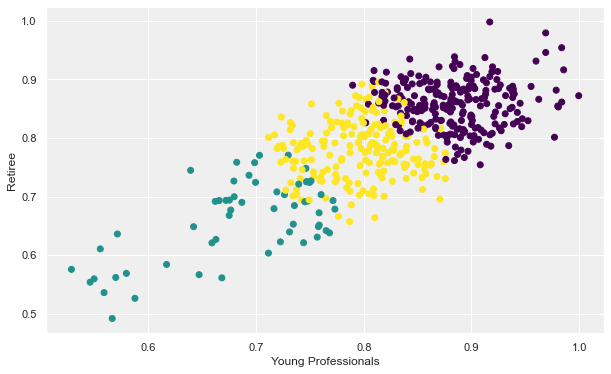

In [234]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Couples with Young Kids

x = df["YP_Index"]
y = df["Retiree_Index"]
plt.scatter(x , y , c = df["clusters"] , cmap='viridis')

plt.xlabel("Young Professionals")
plt.ylabel("Retiree")
plt.gcf().set_size_inches((10, 6))    
plt.show()
